# VIX v/s HV

- El VIX corresponde a expectativas de 30 días de lo que será la potencial fluctuación del S&P 500 (SPX) durante los próximos 12 meses, mientras que la volatilidad histórica (HV) vendría a ser la desviación estándar de los retornos del SPX, el cálculo puede anualizarse. 
- Hay muchas maneras de calcular volatilidad histórica, pero utilizando precios de cierre, retornos logarítmicos y desviación estándar, es la metodología más aceptada. Comunmente el cálculo de HV toma una ventana de 20 retornos logarítmicos hacia atrás (por eso es histórica), en este caso, tomaremos 20 retornos siguientes (1 mes = 20 días de trading).

En este estudio compararemos volatílidad histórica o realizada (HV) del SPX con el VIX, es decir, expectativas v/s realidad.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # para trabajar y manipular fechas en gráficos de matplotlib
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

#### 1. Obteniendo datos

In [26]:
assets = ['^SPX', '^VIX']
df = pdr.get_data_yahoo(assets, period='max')['Adj Close'].dropna().reset_index()

[*********************100%***********************]  2 of 2 completed


In [27]:
# retornos logarítmicos
df['log returns'] = np.log(df['^SPX']/df['^SPX'].shift())

# HV de los próximos 20 días (1 mes) anualizada
df['HV+20d'] = df['log returns'].shift(-20).rolling(20).std() *np.sqrt(252) *100
df = df.dropna()
df

,Date,^SPX,^VIX,log returns,HV+20d
19,1990-01-29,325.200012,26.440001,-0.001843,13.473178
20,1990-01-30,322.980011,27.250000,-0.006850,13.235857
21,1990-01-31,329.079987,25.360001,0.018710,11.563902
22,1990-02-01,328.790009,24.870001,-0.000882,11.874632
23,1990-02-02,330.920013,24.320000,0.006457,11.898533
...,...,...,...,...,...
8454,2023-07-25,4567.459961,13.860000,0.002811,10.206601
8455,2023-07-26,4566.750000,13.190000,-0.000155,11.193246
8456,2023-07-27,4537.410156,14.410000,-0.006445,11.876722
8457,2023-07-28,4582.229980,13.330000,0.009829,11.516086


#### 3. VIX v/s HV

In [28]:
# diferencia entre VIX y HV
df['dif VIX-HV'] = df['^VIX'] - df['HV+20d']

# crear una columna para indicar si HV > VIX, esto creará datos booleanos
df['HV>VIX'] = df['HV+20d'] > df['^VIX']

# filtrar datos entre 2002 y 2022
inicio = '2002-01-01'
fin = '2022-12-31'

df = df[(df['Date']>=inicio) & (df['Date']<=fin)]
df

,Date,^SPX,^VIX,log returns,HV+20d,dif VIX-HV,HV>VIX
3028,2002-01-02,1154.670044,22.709999,0.005724,16.892773,5.817226,False
3029,2002-01-03,1165.270020,21.340000,0.009138,16.571638,4.768363,False
3030,2002-01-04,1172.510010,20.450001,0.006194,18.184249,2.265752,False
3031,2002-01-07,1164.890015,21.940001,-0.006520,18.149940,3.790061,False
3032,2002-01-08,1160.709961,21.830000,-0.003595,18.174625,3.655375,False
...,...,...,...,...,...,...,...
8310,2022-12-23,3844.820068,20.870001,0.005851,16.820511,4.049489,False
8311,2022-12-27,3829.250000,21.650000,-0.004058,16.925380,4.724619,False
8312,2022-12-28,3783.219971,22.139999,-0.012093,15.973222,6.166777,False
8313,2022-12-29,3849.280029,21.440001,0.017311,16.166845,5.273155,False


#### 4. Estudios

In [29]:
# obetiendo el porcentaje de veces que HV+20d fue mayor que VIX
pctTrue = (df['HV>VIX'].value_counts(normalize=True) *100).round(2)
print(pctTrue)

False    82.54
True     17.46
Name: HV>VIX, dtype: float64


Entre 2002 y 2022 solo en el 17.5% de las ocaciones VH+20d anualizada fue mayor que el VIX, por ende en el 82.5% de las veces el VIX exagerá lo que ocurre realmente con la volatilidad del SPX. 

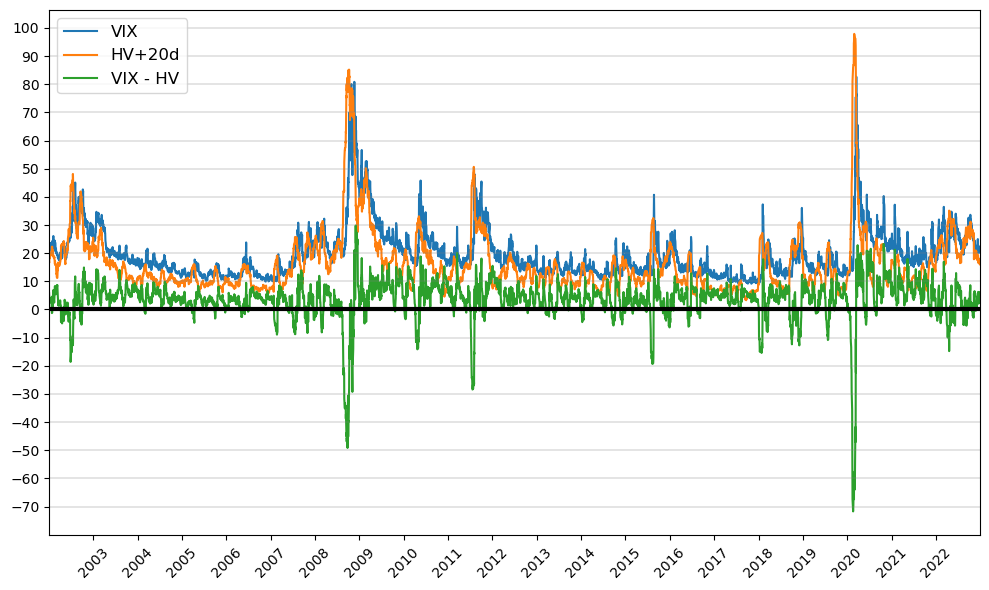

In [30]:
# graficar volatilidades y su diferencial
date = df['Date']
vix = df['^VIX']
hv = df['HV+20d']
dif = df['dif VIX-HV']

plt.figure(figsize=(10, 6))  
plt.plot(date, vix, label='VIX')
plt.plot(date, hv, label='HV+20d')
plt.plot(date, dif, label='VIX - HV')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# personalizar eje X e Y
plt.xticks(rotation=45)
plt.yticks(range(-70, 101, 10))

# líneas horizontales en el gráfico
for y in range(-70, 101, 10):
    plt.axhline(y, color='gray', linestyle='-', linewidth=0.3)

plt.axhline(y=0, linestyle='-', linewidth=3, color='black')

plt.legend(loc=2, fontsize=12) 

plt.margins(x=0)

plt.tight_layout()
plt.show()

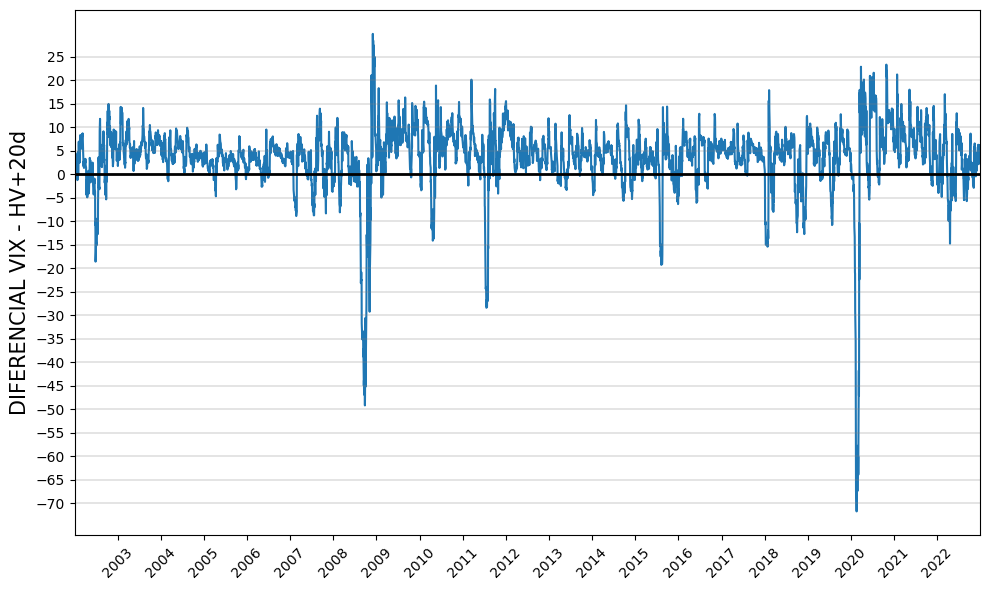

In [31]:
# graficar solo el diferencial
plt.figure(figsize=(10, 6))
plt.plot(date, dif)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.yticks(range(-70, 30, 5))

# líneas horizontales en el gráfico
for y in range(-70, 30, 5):
    plt.axhline(y, color='gray', linestyle='-', linewidth=0.3)

plt.axhline(y=0, color='black', linewidth=2)

plt.ylabel('DIFERENCIAL VIX - HV+20d', fontsize=15)
plt.margins(x=0)

plt.tight_layout()
plt.show()

A primera vista, se aprecia que la mayoría de las veces el diferencial se encuentra entre en 0-10 puntos, en este rango es donde se agrupa la mayoría de los datos. Por otro lado, podemos observar que cuando el diferencial es notablemente negativo, es decir HV+20d > VIX, se debe a situaciones complejas para el mercado, por ejemplo 2008-2009 (crisis subprime), casi -50 diferencial, mediados del 2011 (crisis deuda europea), diferencial cercano a -30, y principios 2020 (covid), un diferencial de más de -70, esos son los casos más notorios.

Centremonos en el diferencial VIX - HV, veamos esta distribución en profundidad, para ello, primero realizaremos algunos ajustes de los datos de la columna 'dif VIX-HV' para facilitar la visualización.

In [32]:
# aproximando los valores a su número entero más cercano (redondear)
ptsDif = df['dif VIX-HV'].round()
ptsDif = ptsDif.apply(lambda x: 0 if x == -0.0 else x)
ptsDif = ptsDif.astype(int)
ptsDif.describe()

count    5287.000000
mean        3.459429
std         7.598004
min       -72.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        30.000000
Name: dif VIX-HV, dtype: float64

In [33]:
# agruparemos los valores extremos, ya que tienen poca frecuencia.
def transform_value(value):
    if value > 14:
        return 15 # valores mayores a 14 serán todos 15
    elif value < -14:
        return -15 # valores menores a -14 serán todos -15
    return value

ptsDifAg = ptsDif.apply(transform_value)

# crearemos nuevo dataframe que contenga los valores enteros y agrupados de 'dif VIX-HV', y su respectiva distribución o frecuencia
frecPts = pd.DataFrame(ptsDifAg.value_counts().sort_index()).reset_index()
frecPts.rename(columns = {'index':'dif VIX-HV', 'dif VIX-HV':'frecuencia'}, inplace = True)
frecPts['porcentaje'] = frecPts['frecuencia']/frecPts['frecuencia'].sum()    
frecPts.sample(10)

,dif VIX-HV,frecuencia,porcentaje
6,-9,21,0.003972
29,14,48,0.009079
25,10,149,0.028182
16,1,297,0.056176
8,-7,24,0.004539
15,0,199,0.037639
12,-3,107,0.020238
11,-4,67,0.012673
13,-2,115,0.021751
9,-6,38,0.007187


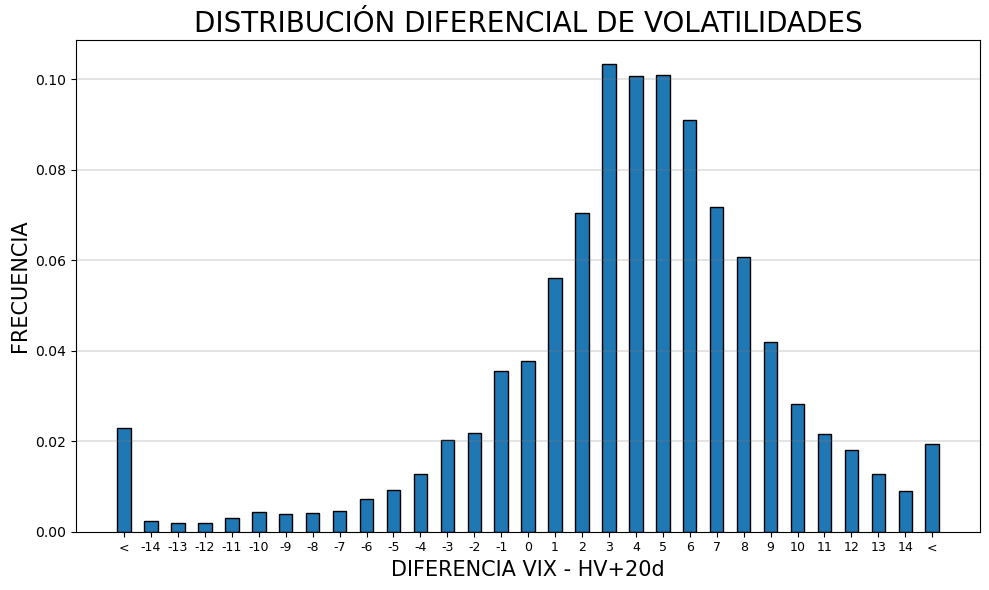

In [34]:
# gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(frecPts['dif VIX-HV'], frecPts['porcentaje'], edgecolor='black', width=0.5)

x_labels = ['<', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '<',]
plt.xticks(frecPts['dif VIX-HV'], x_labels, fontsize=9)
plt.xticks(fontsize=9)

plt.title('DISTRIBUCIÓN DIFERENCIAL DE VOLATILIDADES', fontsize=20)
plt.xlabel('DIFERENCIA VIX - HV+20d', fontsize=15)
plt.ylabel('FRECUENCIA', fontsize=15)

y_values = [0.02, 0.04, 0.06, 0.08, 0.10]
for y in y_values:
    plt.axhline(y=y, color='gray', linestyle='-', linewidth=0.3)

plt.tight_layout()
plt.show()

Aunque las mayores diferencias registradas se dan cuando HV es mayor que el VIX, estos son casos que ocurren con muy poca frecuencia, como vimos, mayormente en periodos complejos para el SPX. Gran parte del diferencial VIX - HV+20d se agrupa entre 3 y 6 puntos, aproximadamente el 40% de los datos están dentro de este rango. Si ampliamos el rango, podríamos decir que cerca del 60% del diferencial se encuentra entre 2 y 8 puntos.